DATA CLEANING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p        
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')    


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,StratifiedKFold

In [3]:
df = pd.read_csv('Data file.csv')

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [15]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [18]:
df.shape

(209593, 37)

In [19]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [20]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [28]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

PROCESSING PROCESS

In [8]:
unique = df.nunique()
unique = unique[unique.values == 1]

In [9]:
df.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (209593, 35) rows & columns.


In [10]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [13]:
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pdate,209593,82,2016-07-04,3150


In [14]:
df1=df.copy()

In [15]:
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 35)

DOING SOME EXPLORATION OF DATA

In [16]:
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print('**********************************************************************************************************')
        print('\n')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
**********************************************************************************************************


pdate : ['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '201

In [17]:
for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())
        print('//////*******************************************************************************///////')

aon : 4282
4282
//////*******************************************************************************///////
daily_decr30 : 130323
130323
//////*******************************************************************************///////
daily_decr90 : 139842
139842
//////*******************************************************************************///////
rental30 : 117881
117881
//////*******************************************************************************///////
rental90 : 125595
125595
//////*******************************************************************************///////
last_rech_date_ma : 1061
1061
//////*******************************************************************************///////
last_rech_date_da : 1061
1061
//////*******************************************************************************///////
fr_ma_rech30 : 961
961
//////*******************************************************************************///////
sumamnt_ma_rech30 : 13130
13130
//////***********

In [18]:
df['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

In [19]:
df['label'].value_counts(normalize=True) *90

1    77.503423
0    12.496577
Name: label, dtype: float64

In [20]:
df_cor = df.corr()
df_cor


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,...,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,...,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,...,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,...,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,...,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,...,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,...,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,...,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,...,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,...,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


In [21]:
df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['pYear']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year


In [22]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


CHECKING DATA DISTRIBUTION/ VISUALIZATION

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

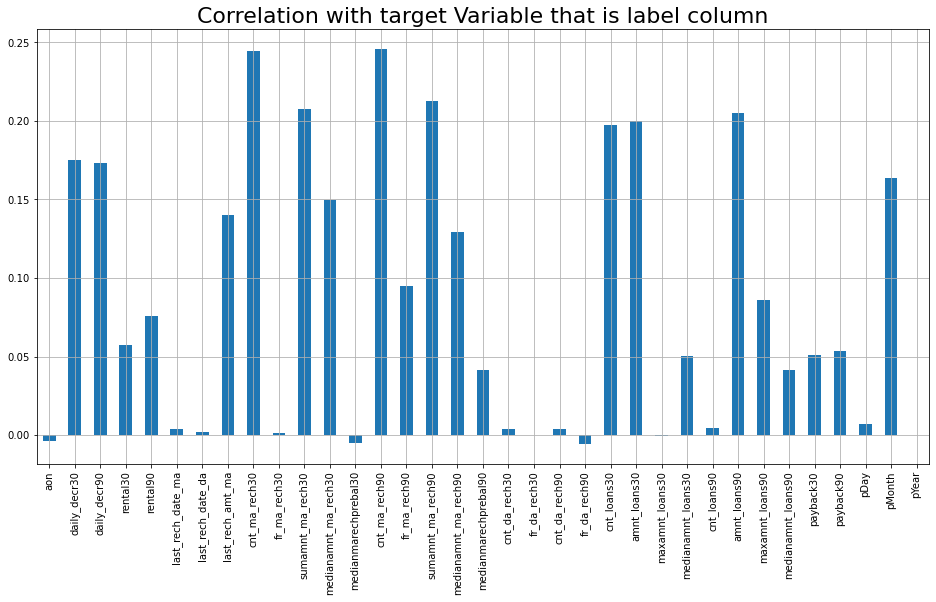

In [24]:
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=22)


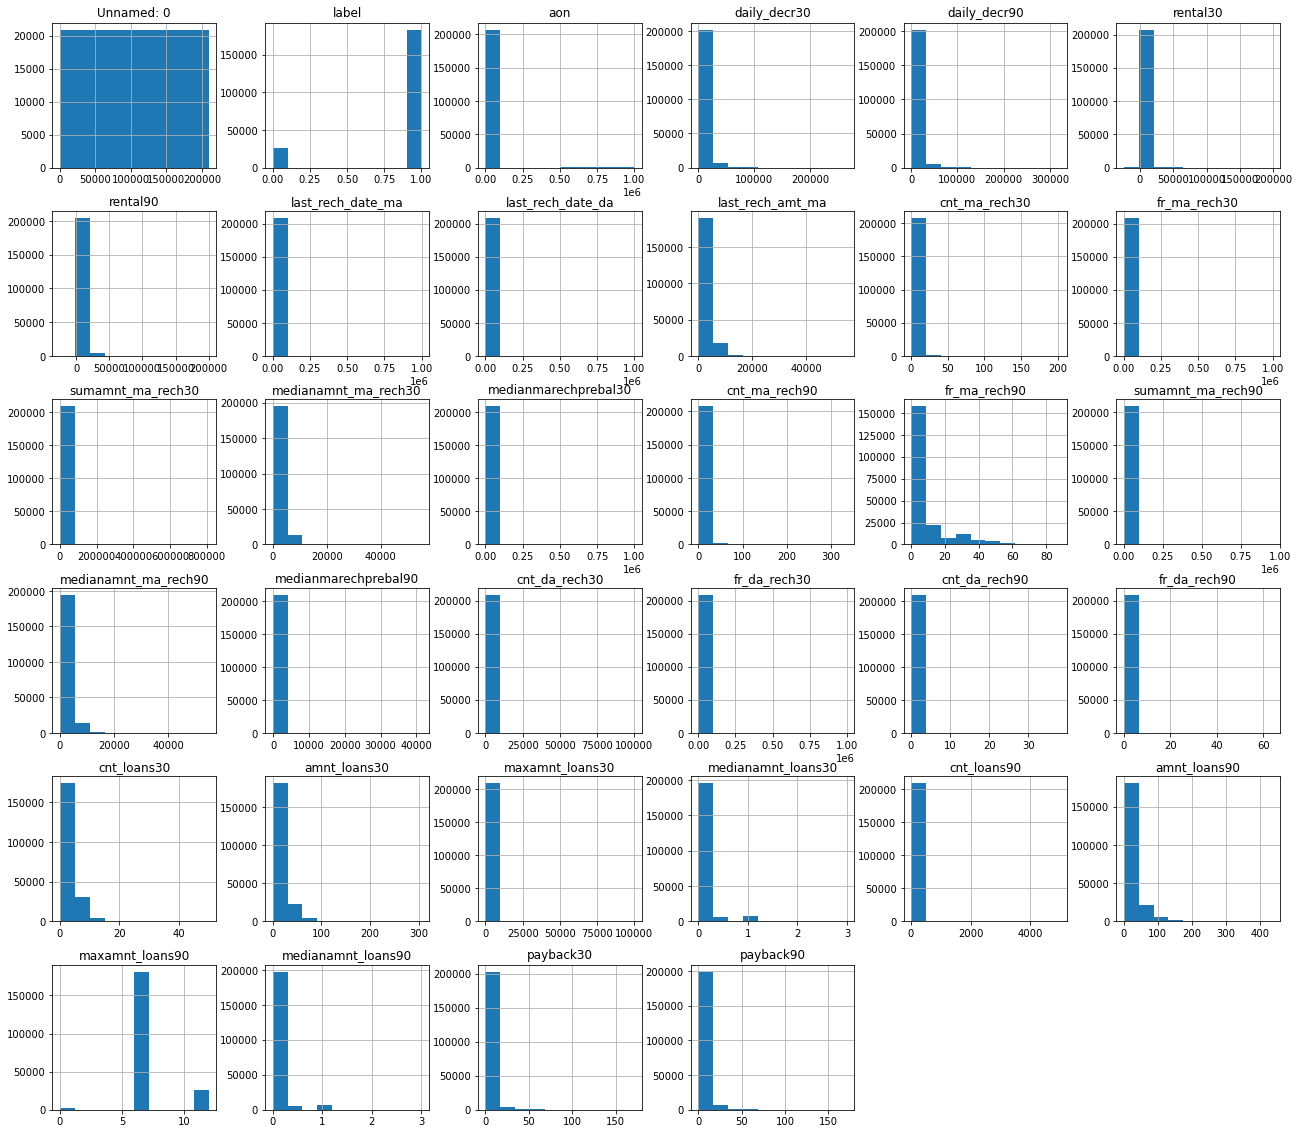

In [30]:
df.hist( figsize = (22, 20) )
plt.show()

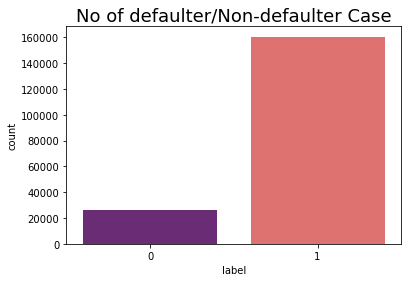

1    160383
0     25860
Name: label, dtype: int64


In [25]:
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

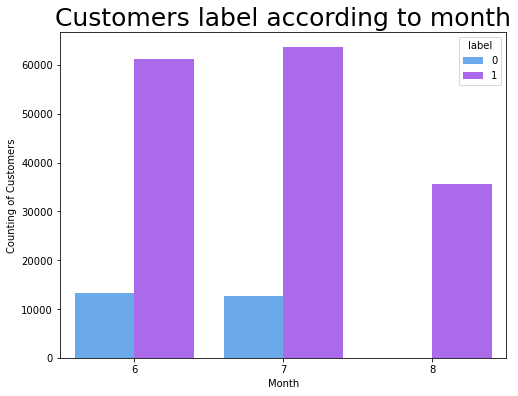

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()


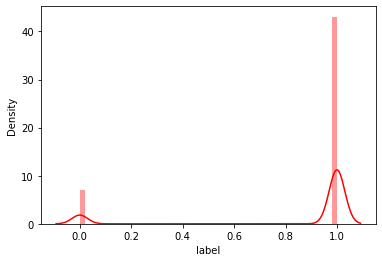

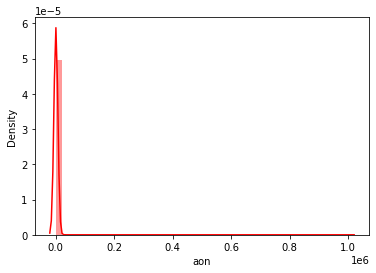

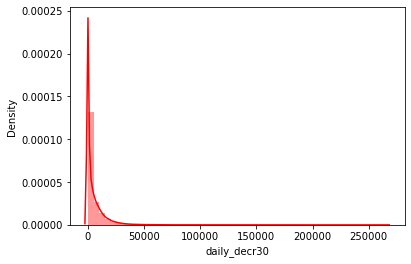

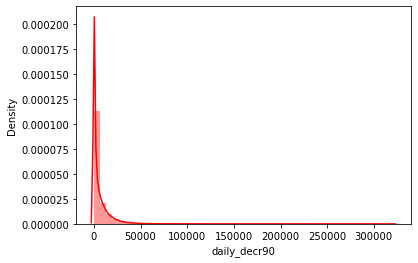

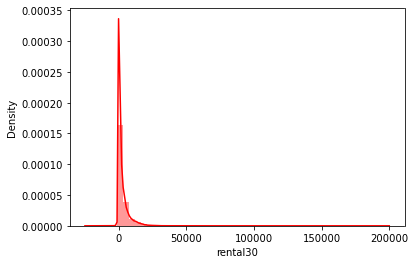

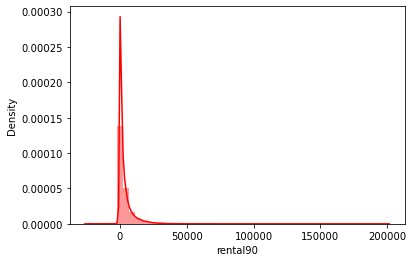

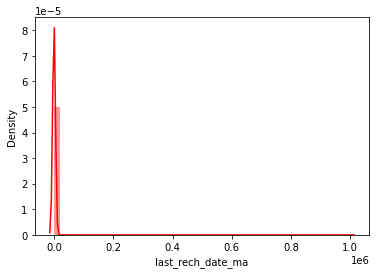

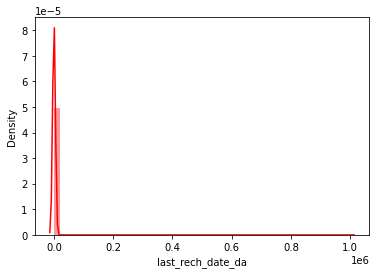

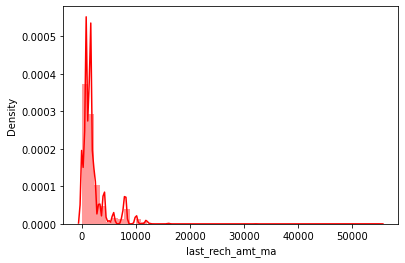

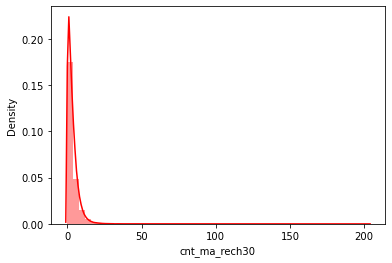

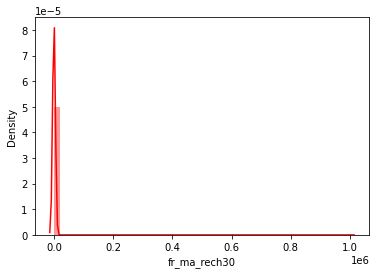

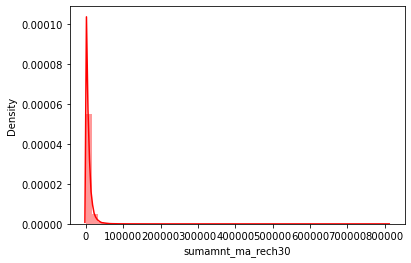

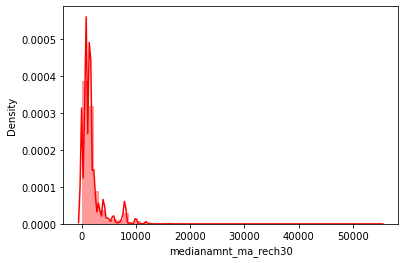

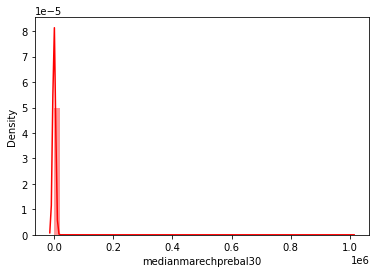

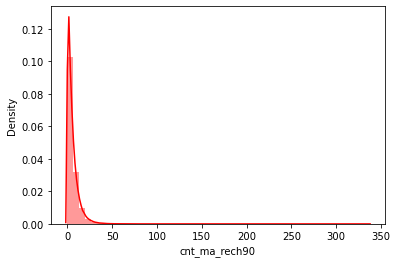

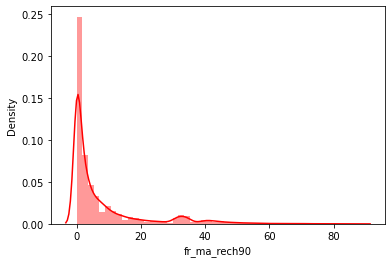

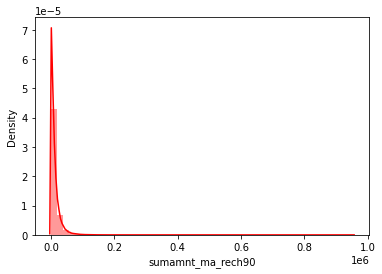

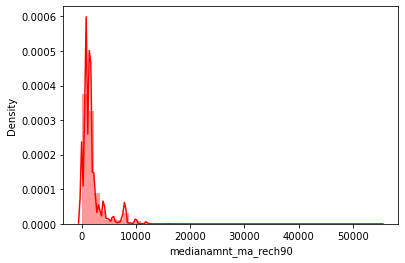

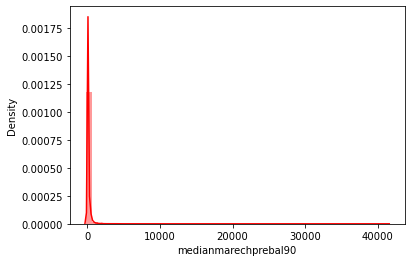

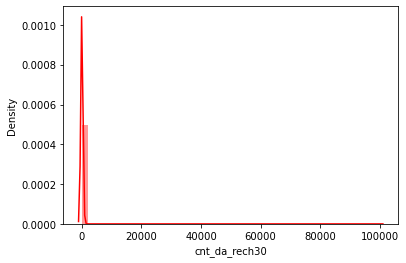

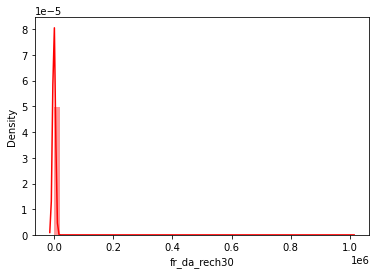

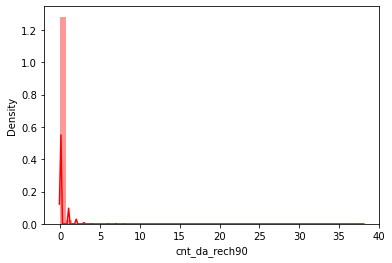

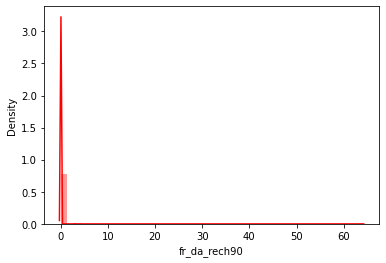

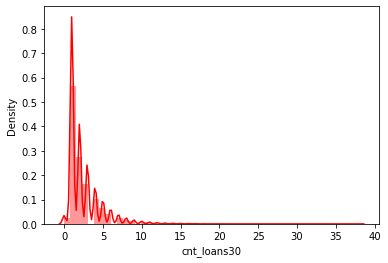

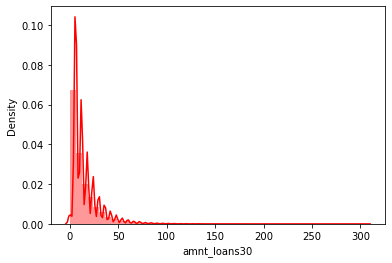

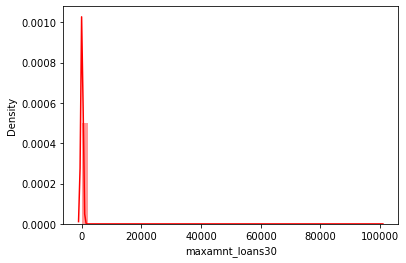

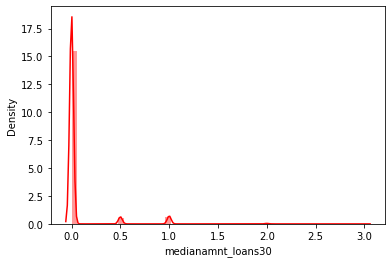

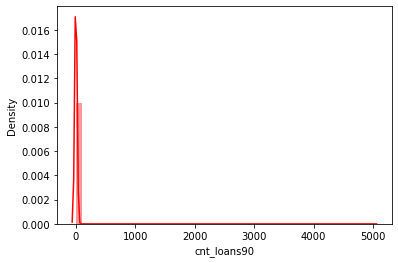

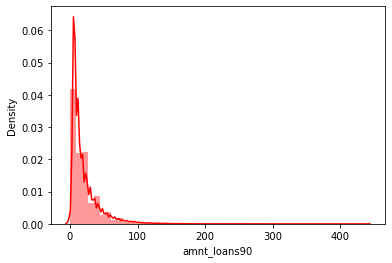

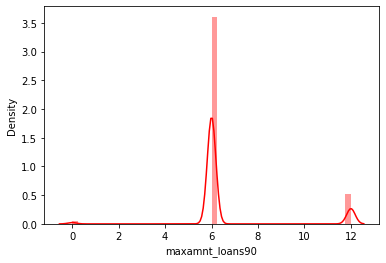

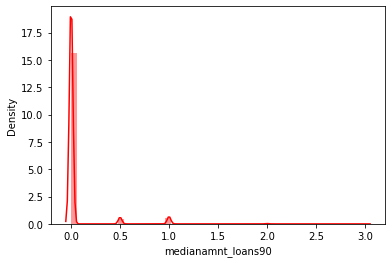

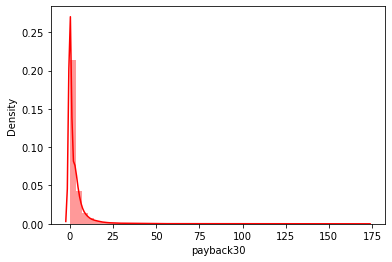

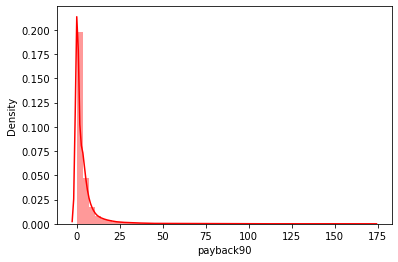

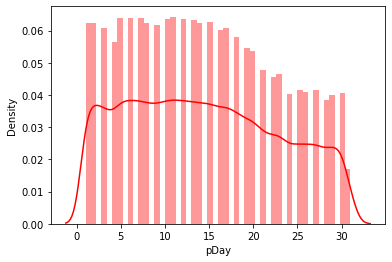

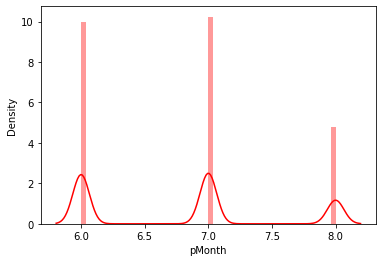

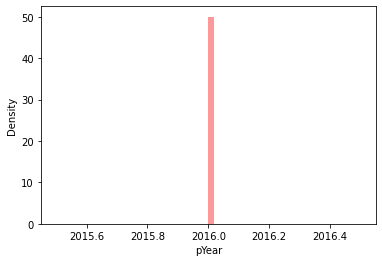

In [27]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [28]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr30             4.003019
daily_decr90             4.301490
rental30                 4.676793
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
amnt_loans30             3.006644
maxamnt_loans30         17.718074
medianamnt_loans30       4.470128
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans9

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

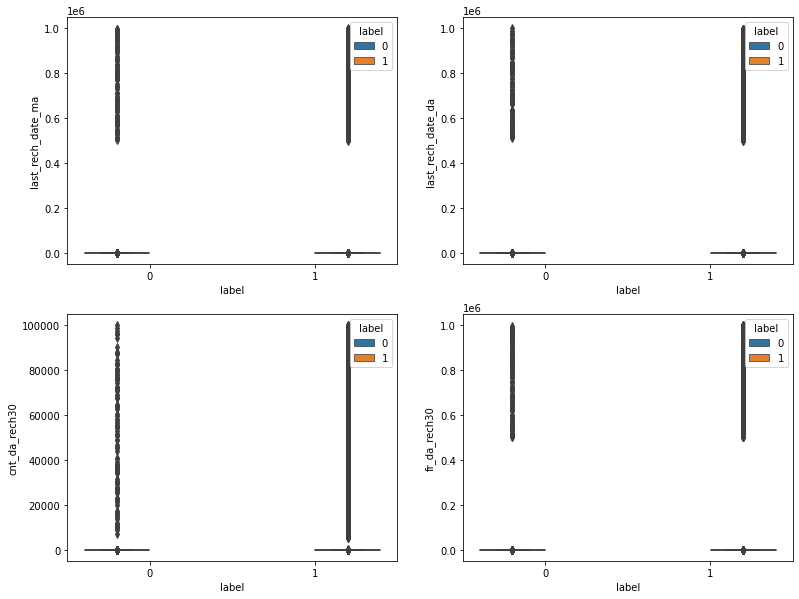

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (13, 10))
sns.boxplot(ax=ax1, x = 'label', y = 'last_rech_date_ma', hue = 'label', data = df)
sns.boxplot(ax=ax2, x = 'label', y = 'last_rech_date_da', hue = 'label', data = df)
sns.boxplot(ax=ax3, x = 'label', y = 'cnt_da_rech30', hue = 'label', data = df)
sns.boxplot(ax=ax4, x = 'label', y = 'fr_da_rech30', hue = 'label', data = df)

In [35]:
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pdate'],axis=1,inplace=True)

In [36]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate', 'pDay', 'pMonth', 'pYear'],
      dtype='object')

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,2.647896,0.103577,0.252299,0.276346,0.573844,0.558583,0.069637,0.069550,0.221637,0.464760,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,2.904700,2.394093
1,0.377658,0.097764,0.731037,0.553380,0.231788,0.036020,0.069303,0.069550,1.570178,0.699718,...,0.688582,0.342470,0.061871,0.247794,0.077941,0.439950,2.517690,0.229594,0.385630,0.419233
2,0.377658,0.100102,0.432011,0.429033,0.416020,0.447674,0.069619,0.069550,0.221637,0.699718,...,0.688582,0.687700,0.063284,0.247794,0.077941,0.666624,0.334212,0.229594,0.385630,0.419233
3,0.377658,0.103986,0.581326,0.555125,0.587935,0.576036,0.068914,0.069550,0.471344,0.934677,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.385630,0.419233
4,0.377658,0.094660,0.567293,0.543274,0.369886,0.413227,0.069600,0.069550,0.103151,0.710030,...,1.660218,1.383682,0.063284,0.247794,0.051250,0.693417,0.334212,0.229594,0.120890,0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.377658,0.101833,0.567157,0.543159,0.372140,0.414910,0.069656,0.069550,0.836664,0.229802,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.272170,0.322221
209589,0.377658,0.092969,0.579622,0.553686,0.223791,0.304144,0.069600,0.069550,0.544737,0.005156,...,0.094351,0.002761,0.063284,0.247794,0.069044,0.213277,0.334212,0.229594,0.272170,0.322221
209590,0.377658,0.093788,0.700790,0.533194,0.735567,0.937500,0.069619,0.069550,0.221637,0.240114,...,0.485818,1.383682,0.061871,0.247794,0.055699,1.146764,2.517690,0.229594,0.068209,0.047356
209591,0.377658,0.084289,0.770755,0.594558,0.529352,0.433039,0.069637,0.068838,0.544737,0.240114,...,0.297116,0.002761,0.061871,0.247794,0.069044,0.013396,2.517690,0.229594,0.385630,0.599385


In [41]:
threshold=5
print(np.where(z>5))

(array([    30,     53,     65, ..., 209533, 209550, 209576]), array([ 6,  6,  1, ...,  6, 28,  1]))


In [42]:
df1_new=df1[(z<3).all(axis=1)]

In [43]:
print(df1.shape,'\t\t',df1_new.shape)

(209593, 33) 		 (161465, 33)


In [52]:
x = df.drop(['label'], axis=1)

y = df['label']

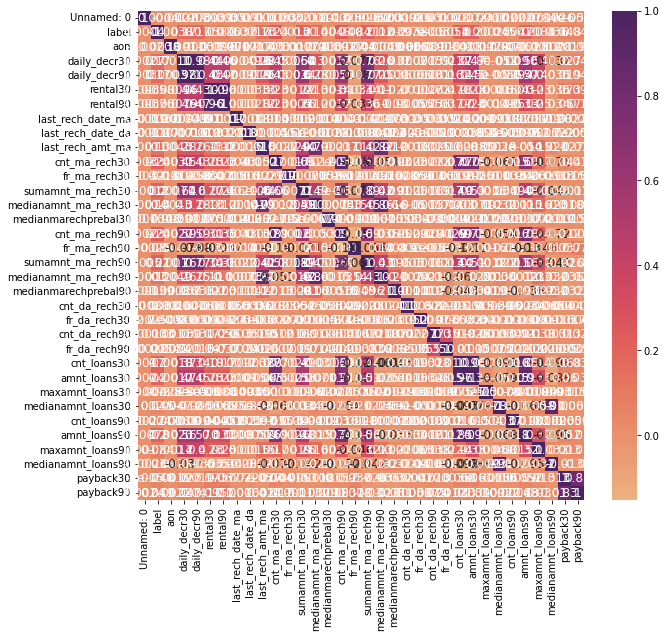

In [35]:
fig, ax = plt.subplots( figsize = (10,9) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 12})
plt.show()

In [51]:
df["maxamnt_loans30"].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
                 ...  
30346.385852         1
66821.819056         1
55716.817238         1
41580.156627         1
96927.243252         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['maxamnt_loans90'], axis=1)
y = df['maxamnt_loans90']


X_train, X_valid, y_train, Y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)
